In [1]:
import os, sys
import os.path as osp
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20
import mmcv
from mmdet.datasets import learned_aug as aug
os.chdir('/home/damon/Github/mmlab/mmdetection/')
%load_ext autoreload
%autoreload 2
sys.path.append('/home/damon/detorch/')
from visualization_utils import *
from debug_utils import *
import inspect
swap = lambda b: np.stack([b[..., 1], b[..., 0], b[..., 3], b[..., 2]], 1)

In [2]:
from visdrone.utils import result_utils
img = '/home/damon/DATASETS/Drone2019/VisDrone2019-DET/VisDrone2018-DET-train-patch/images/0000013_00465_d_0000067__540_960_0_0_768_539.jpg'
txt = '/home/damon/DATASETS/Drone2019/VisDrone2019-DET/VisDrone2018-DET-train-patch/annotations/0000013_00465_d_0000067__540_960_0_0_768_539.txt'
gt = result_utils.single_txt2det(txt)
img = mmcv.imread(img)
gts = np.concatenate(gt, 0)
box = gts[:2, :4]
print(gts)

[[ 88. 469. 116. 529.   1.]
 [103. 457. 144. 505.   1.]
 [ 74. 439. 102. 520.   1.]
 [201. 358. 221. 408.   1.]
 [212. 324. 232. 367.   1.]
 [245. 330. 254. 366.   1.]
 [293. 329. 307. 369.   1.]
 [278. 319. 294. 362.   1.]
 [279. 319. 295. 362.   1.]
 [293. 329. 306. 370.   1.]
 [297. 306. 318. 363.   1.]
 [227. 289. 246. 330.   1.]
 [343. 289. 361. 346.   1.]
 [513. 196. 525. 239.   1.]
 [277. 270. 292. 317.   1.]
 [250. 266. 267. 317.   1.]
 [228. 287. 251. 325.   1.]
 [402. 209. 415. 256.   1.]
 [414. 204. 427. 249.   1.]
 [446. 228. 459. 276.   1.]
 [444. 221. 454. 265.   1.]
 [449. 199. 465. 236.   1.]
 [463. 192. 476. 232.   1.]
 [502. 175. 518. 213.   1.]
 [487. 154. 500. 188.   1.]
 [473. 145. 483. 186.   1.]
 [416. 127. 426. 152.   1.]
 [443. 125. 453. 146.   1.]
 [505. 127. 512. 157.   1.]
 [465. 129. 473. 157.   1.]
 [491. 129. 498. 155.   1.]
 [471. 125. 478. 143.   1.]
 [461. 109. 467. 129.   1.]
 [455. 105. 462. 127.   1.]
 [484. 131. 489. 146.   1.]
 [487. 120. 493. 145

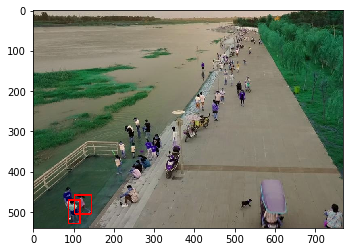

In [3]:
ret = draw_bounding_boxes_on_image_array(img, swap(box))
plt.imshow(ret)

# Equalize

In [4]:
img.mean()

106.05586138804604

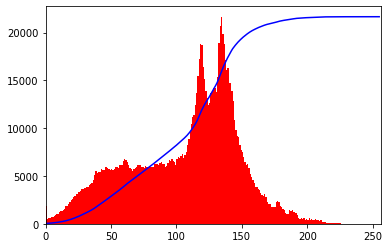

In [5]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = cdf * hist.max() / cdf.max()

plt.plot(cdf_norm, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.show()

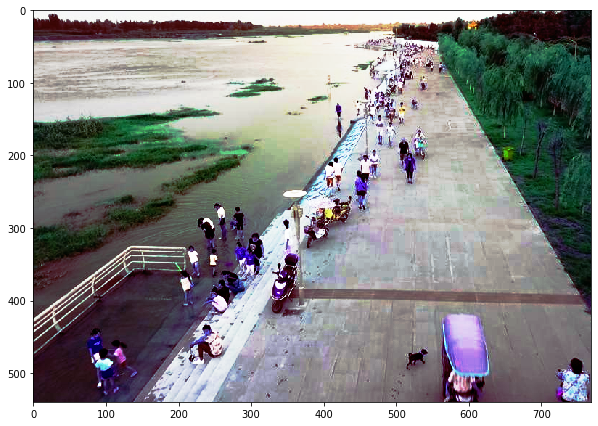

In [32]:
imge = aug.equalize(img, method='cv2')
plt.imshow(imge)

# Rotate

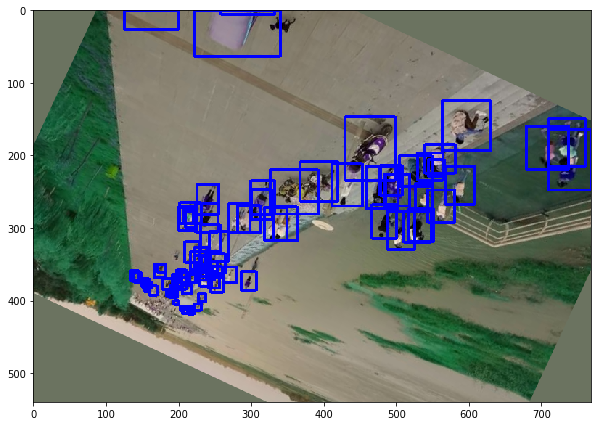

In [33]:
i2, b2 = aug.rotate_with_bboxes(img, gts, 155)
ret = draw_bounding_boxes_on_image_array(i2, swap(b2), color='blue')
plt.imshow(ret);plt.show()

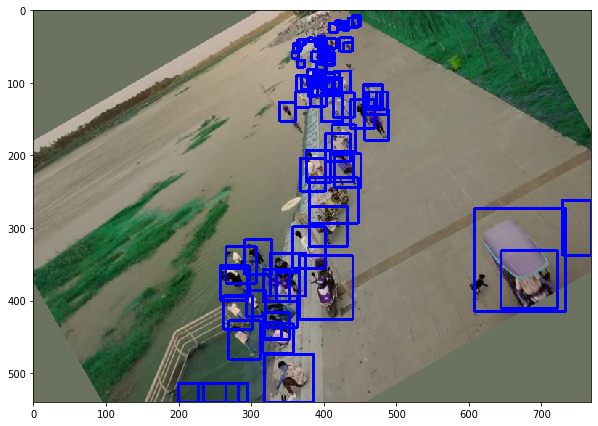

In [34]:
i2, b2 = aug.rotate_with_bboxes(img, gts, 30)
ret = draw_bounding_boxes_on_image_array(i2, swap(b2), color='blue')
plt.imshow(ret); plt.show()

# Translate X(Y)

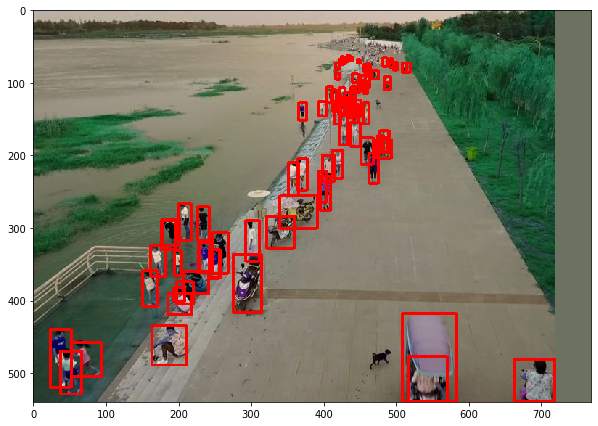

In [35]:
imgt, bbt = aug.translate_bbox(img, gts, 50, shift_horizontal=True)
ret = draw_bounding_boxes_on_image_array(imgt, swap(bbt))
plt.imshow(ret); plt.show()

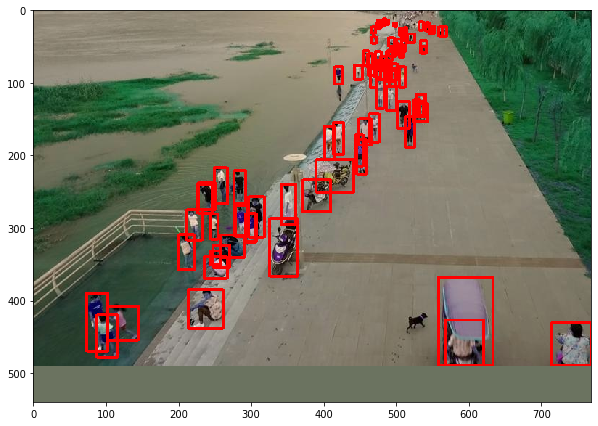

In [36]:
imgt, bbt = aug.translate_bbox(img, gts, 50, shift_horizontal=False)
ret = draw_bounding_boxes_on_image_array(imgt, swap(bbt))
plt.imshow(ret); plt.show()

# Bbox only equalize

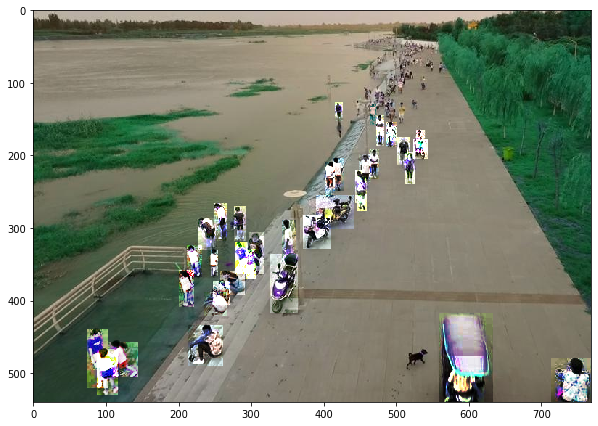

In [37]:
gt_bb = gts[:, :4]
imge = aug.equalize_only_bbox(img, gt_bb)
plt.imshow(imge);plt.show()

# bbox only rotate

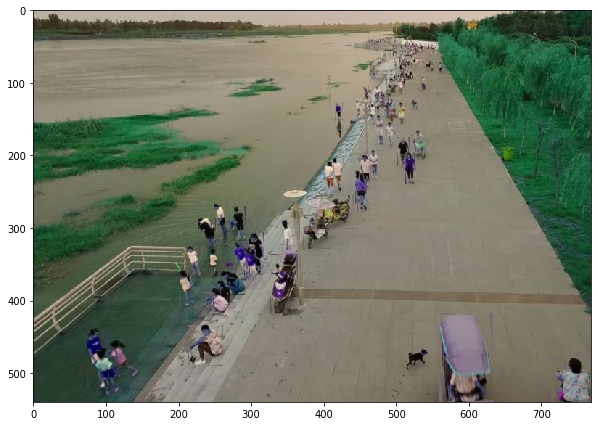

In [38]:
imgr = aug.rotate_only_bbox(img, gt_bb, 5)
plt.imshow(imgr);plt.show()

# Translate only bbox

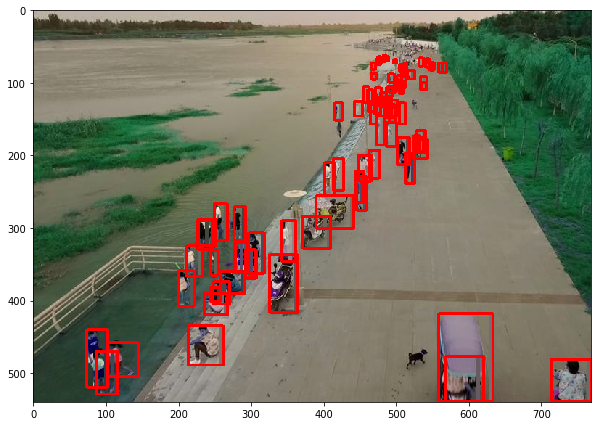

In [39]:
imgt = aug.translate_x_only_bboxes(img, gt_bb, 5)
imgt = draw_bounding_boxes_on_image_array(imgt, swap(gt_bb))
plt.imshow(imgt);plt.show()

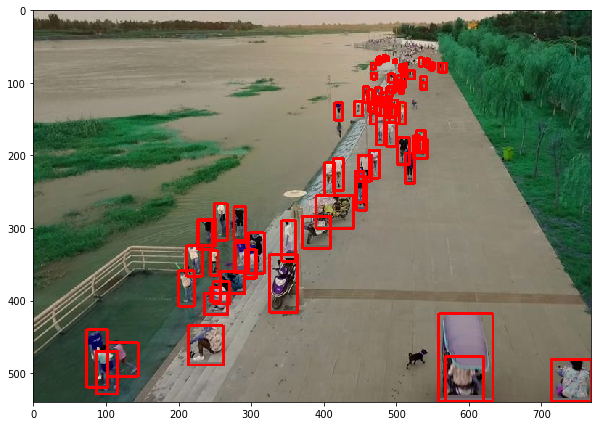

In [40]:
imgt = aug.translate_y_only_bboxes(img, gt_bb, 5)
imgt = draw_bounding_boxes_on_image_array(imgt, swap(gt_bb))
plt.imshow(imgt);plt.show()

# Build policies

In [133]:
aug.NAME_TO_FUNC

{'Equalize': <function mmdet.datasets.learned_aug.equalize(image)>,
 'Rotate_With_BBox': <function mmdet.datasets.learned_aug.rotate_with_bboxes(image, bboxes, degrees)>,
 'TranslateX_BBox': <function mmdet.datasets.learned_aug.<lambda>(image, bboxes, pixels)>,
 'TranslateY_BBox': <function mmdet.datasets.learned_aug.<lambda>(image, bboxes, pixels)>,
 'Rotate_Only_BBoxes': <function mmdet.datasets.learned_aug.rotate_only_bboxes(image, bboxes, prob, mag)>,
 'Equalize_Only_BBoxes': <function mmdet.datasets.learned_aug.equalize_only_bboxes(image, bboxes, prob)>,
 'TranslateX_Only_BBoxes': <function mmdet.datasets.learned_aug.translate_x_only_bboxes(image, bboxes, prob, mag)>,
 'TranslateY_Only_BBoxes': <function mmdet.datasets.learned_aug.translate_y_only_bboxes(image, bboxes, prob, mag, pixels)>}

Equalize


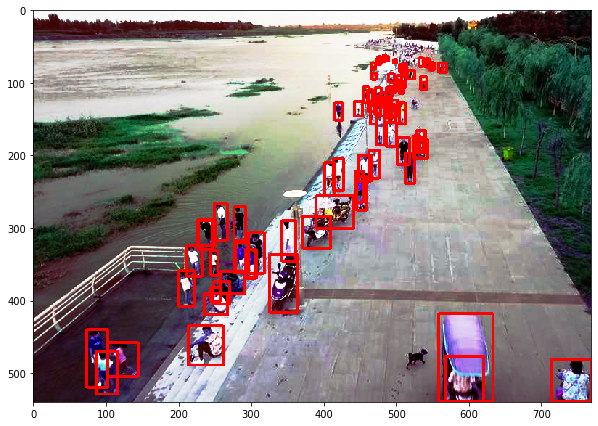

Rotate_With_BBox


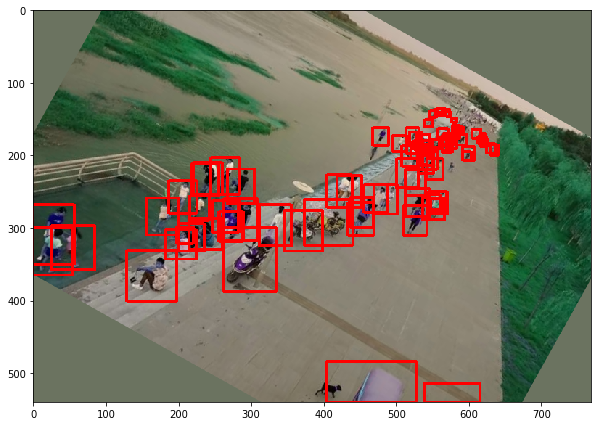

TranslateX_BBox


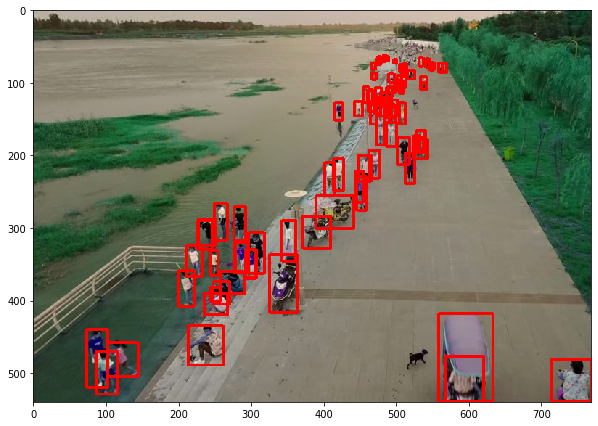

TranslateY_BBox


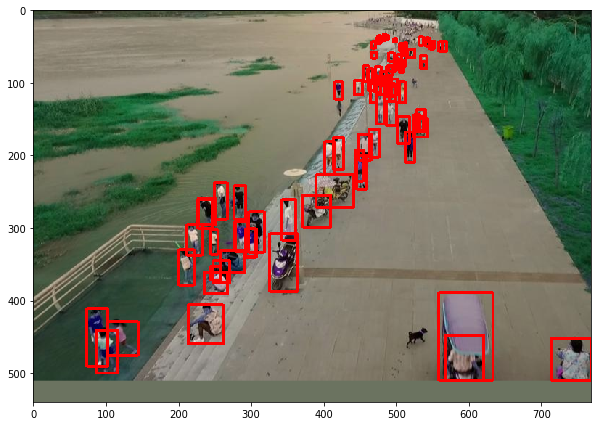

Rotate_Only_BBoxes


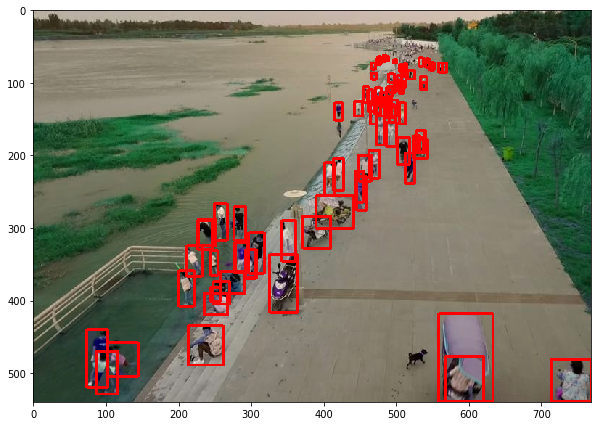

Equalize_Only_BBoxes


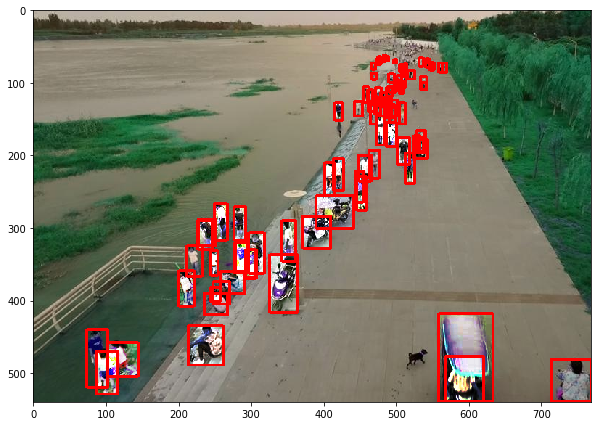

TranslateX_Only_BBoxes


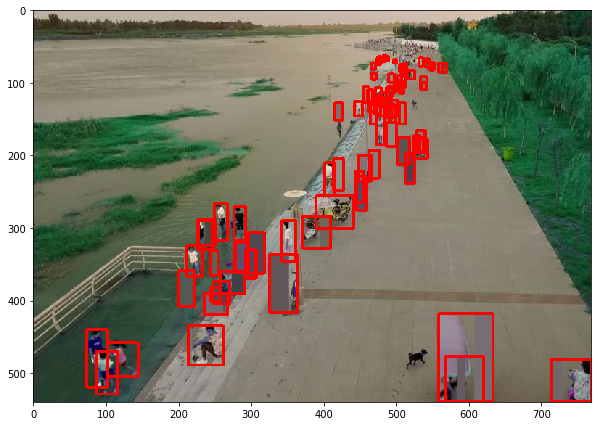

TranslateY_Only_BBoxes


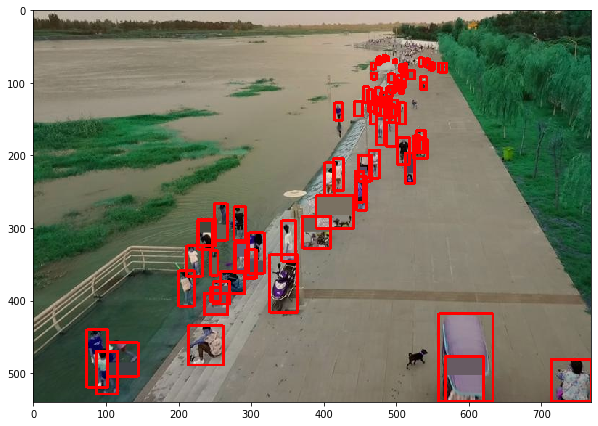

In [138]:
for key in aug.NAME_TO_FUNC.keys():
    print(key)
    func = aug.wrap_with_prob_and_mag(key, 0.8, 30)
    imgt, gt2, label = func(img, gt_bb, None)
    imgt = draw_bounding_boxes_on_image_array(imgt, swap(gt2))
    plt.imshow(imgt);plt.show()

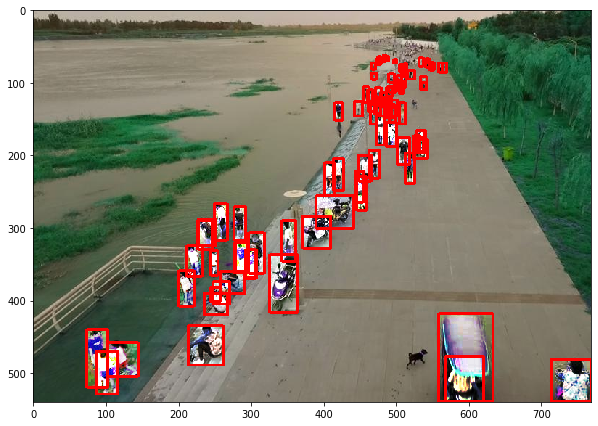

In [136]:
func = aug.wrap_with_prob_and_mag('Equalize_Only_BBoxes', 1.0, 10)

imgt, gt2, label = func(img, gt_bb, None)
imgt = draw_bounding_boxes_on_image_array(imgt, swap(gt2))
plt.imshow(imgt);plt.show()

In [146]:
policies = [
('Rotate_With_BBox', 0.6, 10),
('Equalize', 0.8, 10),
('TranslateY_Only_BBoxes', 0.6, 6),
('TranslateX_BBox', 0.6, 4),
('TranslateY_BBox', 0.6, 6),
('Rotate_Only_BBoxes', 0.6, 6),
('Equalize_Only_BBoxes', 0.8, 10),
('TranslateX_Only_BBoxes', 0.6, 6)]
ps = aug.build_policies(policies=policies)

# extra_aug

In [3]:
from visdrone.utils.test_augs import *
from mmdet.datasets import get_dataset
from mmdet.datasets import extra_aug

cfg = 'visdrone/configs/ssd300_debug.py'
cfg = mmcv.Config.fromfile(cfg)
ds = get_dataset(cfg.data.train).dataset

idx = 2
img_info = ds.img_infos[idx]
# load image
img = mmcv.imread(osp.join(ds.img_prefix, img_info['filename']))
ann = ds.get_ann_info(idx)
gt_bboxes = ann['bboxes']
gt_labels = ann['labels']

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load_annotations time: 0.0s from /home/damon/volatile/VisDrone2019-DET/VisDrone2018-DET-val/annotations_val.json


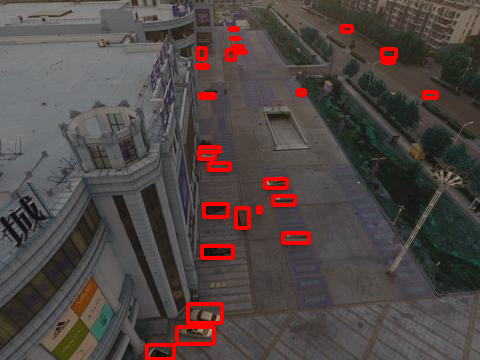

In [39]:
policiesv2 = [
('Rotate_With_BBox', 1, 10),
('Equalize', 1, 10),
('TranslateY_Only_BBoxes', 1, 6)]
op = extra_aug.LearnedPolicy(policies=policiesv2)
out = op(img, gt_bboxes, gt_labels)

ret = draw_bounding_boxes_on_image_array(out[0], swap(out[1]))
visualize_image_array(ret)

In [40]:
policies = [
('Rotate_With_BBox', 0.6, 10),
('Equalize', 0.8, 10),
('TranslateY_Only_BBoxes', 0.6, 6),
('TranslateX_BBox', 0.6, 4),
('TranslateY_BBox', 0.6, 6),
('Rotate_Only_BBoxes', 0.6, 6),
('Equalize_Only_BBoxes', 0.8, 10),
('TranslateX_Only_BBoxes', 0.6, 6)]
for i, p in enumerate(policies):
    policies[i] = (p[0], 1.0, 30)
    op = extra_aug.LearnedPolicy(policies=[policies[i]])
    out = op(img, gt_bboxes, gt_labels)

    ret = draw_bounding_boxes_on_image_array(out[0], swap(out[1]))
    visualize_image_array(ret)